# Drink Quality by Reviews

Examine the correlation between "Rating" and "Review" to determine if the quality of a drink can be predicted based on it's reviews.

In [1]:
!pip install import-ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/ML-Project

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML-Project


In [3]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import nn
import pandas as pd
import random
import import_ipynb
import utils


# to get reproducible results:
torch.manual_seed(1234)
np.random.seed(1234)

importing Jupyter notebook from utils.ipynb


In [4]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

### Preprocessing the Dataset

In [5]:
# read dataset file
df = pd.read_csv('dataset.csv', sep=',')

In [6]:
# replace column names with shorter, more readable names
df.columns = ['Num', 'Brand', 'Name', 'Date', 'Recommend', 'Helpful', 'Rating', 'Weight', 'Review Title', 'Review']
df.sample(5)

,Num,Brand,Name,Date,Recommend,Helpful,Rating,Weight,Review Title,Review
1263,1264,Gmax,Gmax g144105 gm44 full face red wine m,2017-01-09T22:25:24Z,NaN,NaN,4.0,NaN,NaN,easy process
227,228,Heineken,Heineken174 Lager - 6pk / 12oz Bottles,2017-09-20T01:18:35Z,True,NaN,5.0,1.0 lbs,Great beer!,"I bought this, best price and great convenienc..."
2142,2143,Carmex,"Carmex Lip Balm Original Jar - 12 PK, 12.",2017-09-23T02:53:08Z,True,NaN,5.0,NaN,Small and compact!,"The lip balm is so smooth, doesn't have a weir..."
450,451,Jim Beam,"Jim Beam Black Bourbon Whiskey, 50 mL",2017-09-20T01:18:35Z,NaN,NaN,5.0,NaN,My favorite bourbon!,Exceptionally good flavor!
1403,1404,Great Value,"Great Value Original Crescent Rolls, 8 oz",2017-09-02T07:55:36Z,True,0.0,5.0,NaN,Just as good as Pillsbury,Just as good as Pillsbury but better price


In [7]:
# remove useless columns
df.drop("Num", axis=1, inplace=True)
df.drop("Date", axis=1, inplace=True)

In [8]:
# reindex rows
df.reset_index(drop=True, inplace=True)
df.head(10)

,Brand,Name,Recommend,Helpful,Rating,Weight,Review Title,Review
0,Gallo,Ecco Domani174 Pinot Grigio - 750ml Bottle,True,1.0,5.0,1.0 lbs,My Favorite White Wine,This a fantastic white wine for any occasion!
1,Fresh Craft Co.,Fresh Craft174 Mango Citrus - 4pk / 250ml Bottle,True,NaN,5.0,2.45 lbs,Yum!!,"Tart, not sweet...very refreshing and delicious!"
2,1000 Stories,1000 Stories174 Zinfandel - 750ml Bottle,True,NaN,5.0,3.09 lbs,A New Favorite!,I was given this wine so it was a delightful s...
3,1000 Stories,1000 Stories174 Zinfandel - 750ml Bottle,True,NaN,5.0,3.09 lbs,"Bold, Flavorful, Aromatic, Delicious",This is a phenomenal wine and my new favorite ...
4,Wine Cube153,Pink Moscato - 3l Bottle - Wine Cube153,True,1.0,5.0,1.0 lbs,"Yum! Plus, Environmentally Friendly!",4 750ml bottles for the price of two With way ...
5,Beck's Na,Beck's174 Non Alcoholic Beer - 6pk / 12oz Bottles,True,NaN,5.0,1.0 lbs,Great Taste,I LOVE Becks NA. It tastes just like a regular...
6,Gallo,Apothic174 Red Blend - 750ml Bottle,NaN,1.0,3.0,1.0 lbs,Simply Wonderful,This wine has a wonderful but strong aroma its...
7,Gallo,Apothic174 Red Blend - 750ml Bottle,NaN,1.0,2.0,1.0 lbs,A Sweet Red.,I would give one more star if it came clean on...
8,California Roots,California Roots Moscato White Wine - 750ml,True,0.0,5.0,2.65 lbs,NaN,Delicious and very affordable
9,Charles Charles,Charles Charles174 Red Blend - 750ml Bottle,True,NaN,5.0,1.0 lbs,Charles & Charles Red Blend,This is a very smooth red with Aromas of cocoa...


In [9]:
# check for total amount of null values in each column
print(df.isnull().sum())

Brand             65
Name               0
Recommend        979
Helpful         2264
Rating           445
Weight          1894
Review Title      44
Review             1
dtype: int64


In [10]:
# remove all rows that have no ratings or recommendations
df = df.dropna(subset=['Rating'])
df = df.dropna(subset=['Recommend'])
df.isnull().sum()

Brand              0
Name               0
Recommend          0
Helpful         1170
Rating             0
Weight          1392
Review Title      10
Review             0
dtype: int64

In [11]:
# check the all possible ratings from 1 to 5 are used
np.unique(df['Rating'])

array([1., 2., 3., 4., 5.])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748 entries, 0 to 2815
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         1748 non-null   object 
 1   Name          1748 non-null   object 
 2   Recommend     1748 non-null   object 
 3   Helpful       578 non-null    float64
 4   Rating        1748 non-null   float64
 5   Weight        356 non-null    object 
 6   Review Title  1738 non-null   object 
 7   Review        1748 non-null   object 
dtypes: float64(2), object(6)
memory usage: 122.9+ KB


In [13]:
# change data type of "Rating" from float to integer
df['Rating'] = df['Rating'].astype(int)

# change data type of "Recommend" from object to integer
# "True" = 1, "False" = 0
df["Recommend"] = df["Recommend"].astype(int)

# check data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748 entries, 0 to 2815
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         1748 non-null   object 
 1   Name          1748 non-null   object 
 2   Recommend     1748 non-null   int64  
 3   Helpful       578 non-null    float64
 4   Rating        1748 non-null   int64  
 5   Weight        356 non-null    object 
 6   Review Title  1738 non-null   object 
 7   Review        1748 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 122.9+ KB


In [14]:
# inspect correlation between numeric features
df.corr()

,Recommend,Helpful,Rating
Recommend,1.000000,0.042670,0.767292
Helpful,0.042670,1.000000,0.024891
Rating,0.767292,0.024891,1.000000


- There is a weak positive correlation between recommend and helpful. Reviews that were voted helpful tend to be about alcohol that reviewers recommend to others.
- There is a strong positive correlation between recommend and rating. The higher the rating/quality of the alcohol, then then the more likely that the reviewer would recommend it.
- There is a very weak positive correlation between helpful and rating. Alcohol that was voted helpful tend to have slightly higher ratings than reviews not considered helpful.

In [15]:
# check for duplicated reviews
df['Review'].duplicated().sum()

13

In [16]:
# remove duplicated reviews
df['Review'].drop_duplicates()

0           This a fantastic white wine for any occasion!
1        Tart, not sweet...very refreshing and delicious!
2       I was given this wine so it was a delightful s...
3       This is a phenomenal wine and my new favorite ...
4       4 750ml bottles for the price of two With way ...
                              ...                        
2811    My kids love them. So no complaints but I'm su...
2812    Easy and quick to serve, brings a smile to the...
2813                         Worked great kids loved them
2814    Walmart used to carry a Swiss water decaf coff...
2815    Great decaf coffee using Swiss water process. ...
Name: Review, Length: 1735, dtype: object

In [17]:
# clean text in reviews with natural language toolkit
!pip install nltk
import nltk

# define stopwords to remove
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(stopwords.words("english"))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
# tokenize text with regex before cleaning
from nltk import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
token = TreebankWordDetokenizer()

def clean(w):
    w = word_tokenize(w.lower()) # turn all token words lowercase
    w = [token for token in w if token not in stopwords and token.isalpha()] # remove stopwords and non-words (punctuation, numbers, etc.)
    return token.detokenize(w)

df["Clean_Reviews"] = df["Review"].apply(clean)

In [19]:
# check to make sure the reviews were cleaned correctly
df["Clean_Reviews"].sample(10)

1596    prefer purchase store individually whatever ne...
477                             best bloody mary mix ever
2364    started using carmex cna brand count heal supp...
2061    using carmex yrs still always keep jar purse t...
2226    started applying four times day honestly great...
2373    buy carmex tub becuase mother always wood open...
829                                              favorite
1980    use many year really work dry lips light burn ...
1994    always go back carmex original lip balm jar li...
2585    using carmex original lip balm jar since child...
Name: Clean_Reviews, dtype: object

# Neural Network Algorithm - Classification

### Preprocessing

In [20]:
# split dataset 30% test, 70% train
y = df["Rating"].values
words = df["Clean_Reviews"].values

x_train, x_test, y_train, y_test = train_test_split(words, y, test_size=0.3, shuffle=True, random_state=42)

In [21]:
# examine a random dictionary entry
print("Review:", x_train[2])
print("Rating:", y_train[2])

Review: product must work outdoors cant tell many times fellow flagger friends forgot pinch asked use mine thank carmex
Rating: 5


In [22]:
# tokenize the reviews to vectorize each word as an integer
from keras.preprocessing.text import Tokenizer

# limit vocabularly index to the most common 5000 words
tokenizer = Tokenizer(num_words=5000)
# create vocab index based on word frequency
tokenizer.fit_on_texts(x_train)
# apply limited vocab to train and test
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [23]:
# examine a random dictionary entry
print("Encoded Review:", x_train[2])
print("Rating:", y_train[2])

Encoded Review: [4, 175, 65, 1526, 491, 272, 46, 96, 803, 1527, 123, 492, 1069, 804, 5, 352, 101, 2]
Rating: 5


In [24]:
# re-vectorize reviews into sparse 2D nummpy array, with many zeros in the data
# convert the reviews into a matrix, one review per row and one column per word
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

num_words=5000
x_train = vectorize_sequences(x_train, dimension=num_words)
x_test = vectorize_sequences(x_test, dimension=num_words)

print(x_train.shape)
print(x_test.shape)

(1223, 5000)
(525, 5000)


In [25]:
print(y_train[:15])
print(y_test[:15])

[5 5 5 5 5 5 5 5 3 5 5 5 5 5 5]
[4 5 4 5 4 5 4 4 5 5 5 5 5 5 5]


In [26]:
from collections import Counter
cnt = Counter(list(y_train))
num_classes = 5
cnt.most_common(num_classes)

[(5, 1057), (4, 101), (3, 27), (1, 25), (2, 13)]

In [27]:
selected_labels = sorted(set([i[0] for i in cnt.most_common(num_classes)]))
selected_labels

[1, 2, 3, 4, 5]

In [28]:
train_mask = [True if l in selected_labels else False for l in y_train]
x_train = x_train[train_mask, :]
y_train = y_train[train_mask]
y_train = np.array([selected_labels.index(i) for i in y_train]) # reindex

test_mask = [True if l in selected_labels else False for l in y_test]
x_test= x_test[test_mask, :]
y_test = y_test[test_mask]
y_test = np.array([selected_labels.index(i) for i in y_test]) # reindex

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1223, 5000)
(525, 5000)
(1223,)
(525,)


In [29]:
# split training data into 30% train and 70% dev
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size=0.3, random_state=42)
print(y_train.shape)
print(x_train.shape)
print(x_dev.shape)
print(y_dev.shape)

(856,)
(856, 5000)
(367, 5000)
(367,)


In [30]:
# convert numpy array into PyTorch format

# 1) define function
def np2iter(x, y, shuffle=True):
  x = torch.tensor(x, dtype=torch.float)
  y = torch.tensor(y, dtype=torch.long)
  print(x.shape)
  print(y.shape)
  print("----------------------")

  ds = torch.utils.data.TensorDataset(x, y)
  return torch.utils.data.DataLoader(ds, batch_size=32, shuffle=shuffle)

# 2) convert data
train_iter = np2iter(x_train, y_train, shuffle=True) # DO shuffle train
dev_iter =  np2iter(x_dev, y_dev, shuffle=False) # do NOT shuffle dev or test
test_iter =  np2iter(x_test, y_test, shuffle=False)

torch.Size([856, 5000])
torch.Size([856])
----------------------
torch.Size([367, 5000])
torch.Size([367])
----------------------
torch.Size([525, 5000])
torch.Size([525])
----------------------


In [31]:
# defining accuracy
def val_acc(y_pred, y_test): # define accuracy
  y_pred = np.argmax(y_pred, axis=1)
  return accuracy_score(y_pred=y_pred, y_true=y_test)

## Model

In [32]:
# define the model
num_words = 5000
num_ratings = 5

class MultiClassModel(nn.Module):
  def __init__(self, in_features=num_words, out_features=num_ratings):
    super(MultiClassModel, self).__init__()
    
    # define linear layer
    self.layer = nn.Linear(in_features=in_features, out_features=out_features)


  # feed the model the input and apply the linear layer to get the output
  def forward(self, x):
    return self.layer(x) 

In [33]:
classification_model = MultiClassModel(in_features=num_words, out_features=num_classes)
classification_model = classification_model.cuda()

In [34]:
# use crossentropy loss which includes softmax activation automatically
history = utils.train(model=classification_model,
                            loss=nn.CrossEntropyLoss(), 
                            val_metrics={"cls": nn.CrossEntropyLoss(), "acc": val_acc}, 
                            optimizer=torch.optim.SGD(classification_model.parameters(), lr=0.01),
                            train_ds=train_iter, 
                            dev_ds=dev_iter,
                            num_epochs=150)

epoch 1 train loss: 1.4927 val_cls: 1.3696 val_acc: 0.8665
epoch 2 train loss: 1.2729 val_cls: 1.1803 val_acc: 0.8665
epoch 3 train loss: 1.1049 val_cls: 1.0385 val_acc: 0.8665
epoch 4 train loss: 0.9798 val_cls: 0.9341 val_acc: 0.8665
epoch 5 train loss: 0.8871 val_cls: 0.8566 val_acc: 0.8665
epoch 6 train loss: 0.8176 val_cls: 0.7981 val_acc: 0.8665
epoch 7 train loss: 0.7645 val_cls: 0.7534 val_acc: 0.8665
epoch 8 train loss: 0.7234 val_cls: 0.7190 val_acc: 0.8665
epoch 9 train loss: 0.6912 val_cls: 0.6917 val_acc: 0.8665
epoch 10 train loss: 0.6653 val_cls: 0.6699 val_acc: 0.8665
epoch 11 train loss: 0.6443 val_cls: 0.6522 val_acc: 0.8665
epoch 12 train loss: 0.6270 val_cls: 0.6377 val_acc: 0.8665
epoch 13 train loss: 0.6125 val_cls: 0.6258 val_acc: 0.8665
epoch 14 train loss: 0.6003 val_cls: 0.6157 val_acc: 0.8665
epoch 15 train loss: 0.5899 val_cls: 0.6071 val_acc: 0.8665
epoch 16 train loss: 0.5809 val_cls: 0.5998 val_acc: 0.8665
epoch 17 train loss: 0.5730 val_cls: 0.5935 val_a

## Model Evaluation

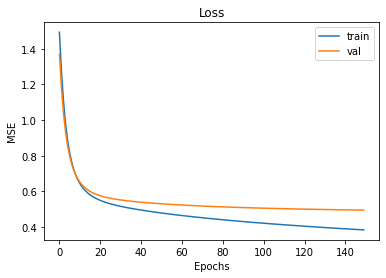

In [35]:
plt.plot(history["train_loss"], label='train');
plt.plot(history["val_cls"], label='val');
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

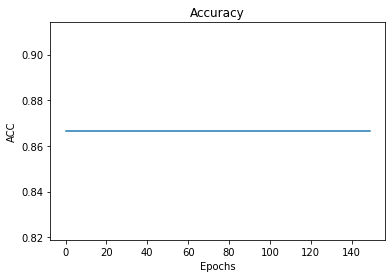

In [36]:
plt.plot(history["val_acc"]);
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC');

In [37]:
# evaluate model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score

predictions = utils.test(classification_model, test_iter)
predictions = np.argmax(predictions, axis=1)

print("Accuracy:", accuracy_score(y_true = y_test, y_pred = predictions))
print("MSE:", mse(y_true = y_test, y_pred = predictions))
print("MAE:", mae(y_true = y_test, y_pred = predictions))


Accuracy: 0.8457142857142858
MSE: 0.6228571428571429
MAE: 0.26095238095238094


In [38]:
# examine accuracy of predictions for test set
pred = utils.test(classification_model, test_iter)
# find the most likely rating for the specific review by finding the column with the highest score in each row of the matrix
conv_pred = np.argmax(pred, axis=1)

# print classification report
print(classification_report(y_pred=conv_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        53
           4       0.85      1.00      0.92       444

    accuracy                           0.85       525
   macro avg       0.17      0.20      0.18       525
weighted avg       0.72      0.85      0.78       525



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


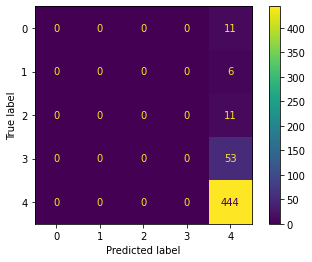

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, conv_pred);